## Sistema de Lorenz

En aquest notebook s'estudia el sistema de Lorenz, definit pel sistema d'equacions diferencials:

$
\begin{cases}
\dot{x} = \sigma(y - x) \\
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}
$


Imports:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm.notebook import tqdm

Fixem els paràmetres del sistema de Lorenz:

In [45]:
def lorenz(t, state, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]



Definició del sistema i simulació de l'òrbita

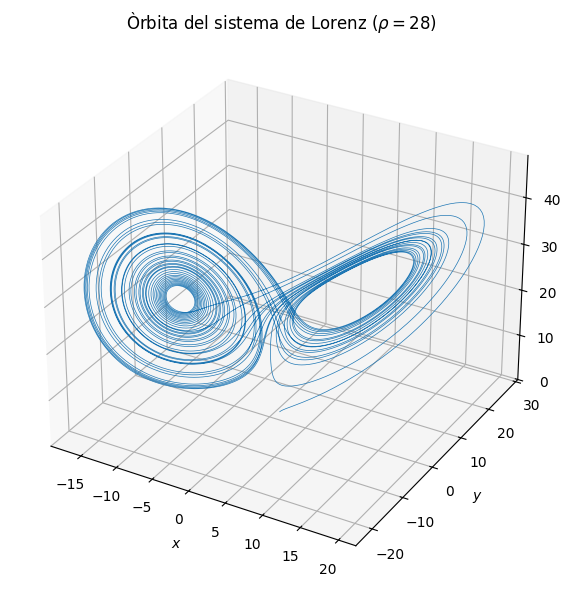

In [46]:
# Simulació i visualització d’una òrbita típica
t_span = (0, 40)
t_eval = np.linspace(*t_span, 10000)
initial_state = [1.0, 1.0, 1.0]
sol = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax.set_title("Òrbita del sistema de Lorenz ($\\rho = 28$)")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
plt.tight_layout()
plt.show()

Comparació d'òrbites amb condicions inicials properes

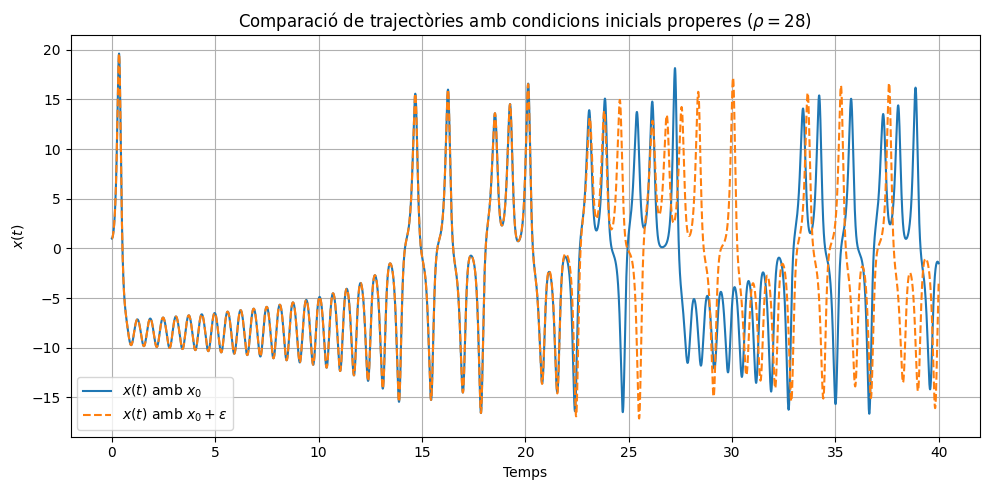

In [48]:
x0 = np.array([1.0, 1.0, 1.0])
x0_perturbed = np.array([1.0001, 1.0, 1.0])
sol1 = solve_ivp(lorenz, t_span, x0, t_eval=t_eval)
sol2 = solve_ivp(lorenz, t_span, x0_perturbed, t_eval=t_eval)

plt.figure(figsize=(10, 5))
plt.plot(t_eval, sol1.y[0], label="$x(t)$ amb $x_0$")
plt.plot(t_eval, sol2.y[0], label="$x(t)$ amb $x_0 + \\epsilon$", linestyle="--")
plt.title("Comparació de trajectòries amb condicions inicials properes ($\\rho=28$)")
plt.xlabel("Temps")
plt.ylabel("$x(t)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Creixement logarítmic de la separació

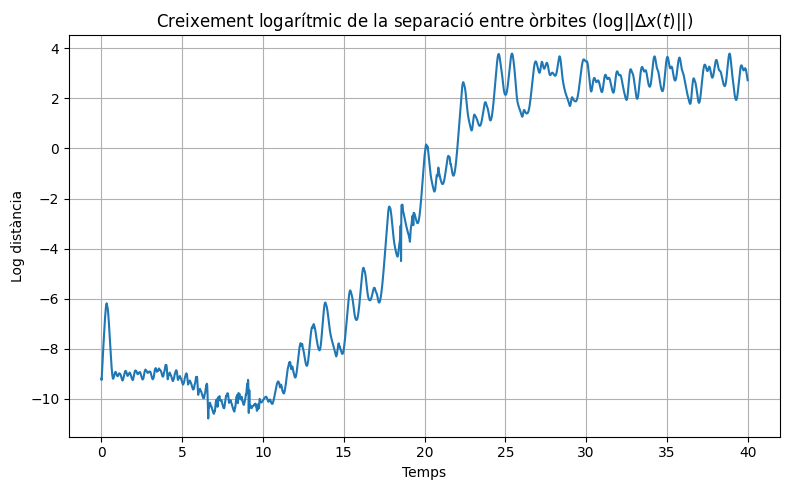

In [49]:
distance = np.linalg.norm(sol1.y - sol2.y, axis=0)
plt.figure(figsize=(8, 5))
plt.plot(t_eval, np.log(distance))
plt.title("Creixement logarítmic de la separació entre òrbites ($\\log ||\\Delta x(t)||$)")
plt.xlabel("Temps")
plt.ylabel("Log distància")
plt.grid(True)
plt.tight_layout()
plt.show()

Diagrama de bifurcació en funció de rho

100%|██████████| 1000/1000 [3:29:18<00:00, 12.56s/it]     


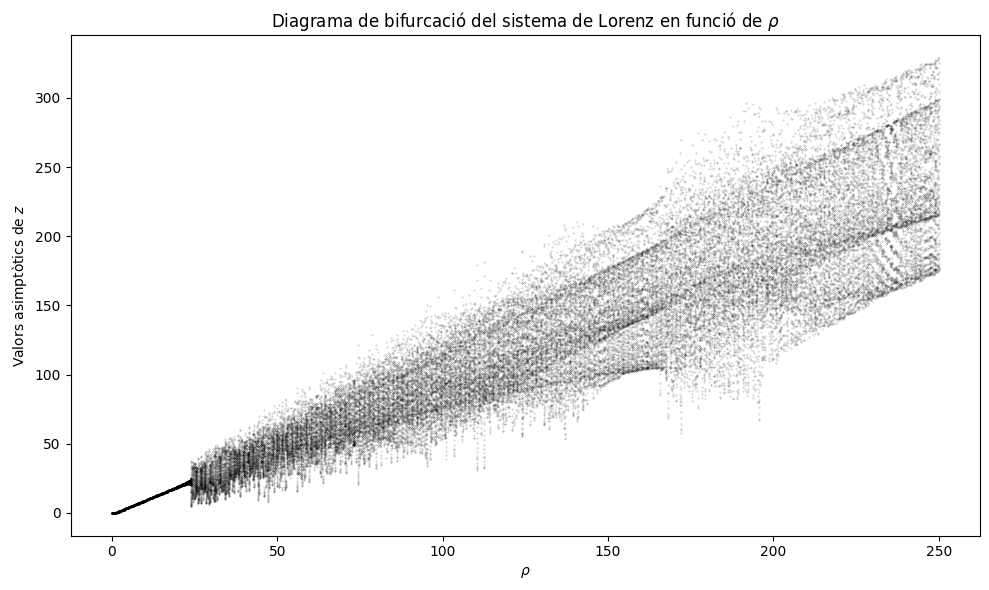

In [75]:
rhos = np.linspace(0, 250, 1000)
x_ends = []

for rho in tqdm(rhos):
    sol = solve_ivp(lambda t, y: lorenz(t, y, sigma=10, rho=rho, beta=8/3),
                    (0, 150), [1.0, 1.0, 1.0], t_eval=np.linspace(0, 50, 2000))
    x_ends.append(sol.y[2][-50:])  # valors finals de z

plt.figure(figsize=(10, 6))
for i, rho in enumerate(rhos):
    plt.scatter([rho]*len(x_ends[i]), x_ends[i], s=0.1, color='black', alpha=0.3)

plt.title("Diagrama de bifurcació del sistema de Lorenz en funció de $\\rho$")
plt.xlabel("$\\rho$")
plt.ylabel("Valors asimptòtics de $z$")
plt.tight_layout()
plt.show()


Càlcul de l'exponent de Lyapunov màxim en funció de rho

In [77]:
def compute_lyapunov(rho, t_max=100, dt=0.01):
    sigma = 10
    beta = 8/3
    delta0 = 1e-8
    t_vals = np.arange(0, t_max, dt)
    
    x1 = np.array([1.0, 1.0, 1.0])
    x2 = x1 + np.array([delta0, 0, 0])

    lyap_sum = 0.0
    n = 0
    
    for t in t_vals:
        sol1 = solve_ivp(lorenz, [0, dt], x1, args=(sigma, rho, beta), t_eval=[dt])
        sol2 = solve_ivp(lorenz, [0, dt], x2, args=(sigma, rho, beta), t_eval=[dt])
        
        x1 = sol1.y[:, -1]
        x2 = sol2.y[:, -1]
        
        delta = x2 - x1
        dist = np.linalg.norm(delta)
        
        if dist == 0:
            continue
        
        lyap_sum += np.log(dist / delta0)
        delta = delta0 * delta / dist
        x2 = x1 + delta
        n += 1

    return lyap_sum / (n * dt)


100%|██████████| 100/100 [04:53<00:00,  2.93s/it]


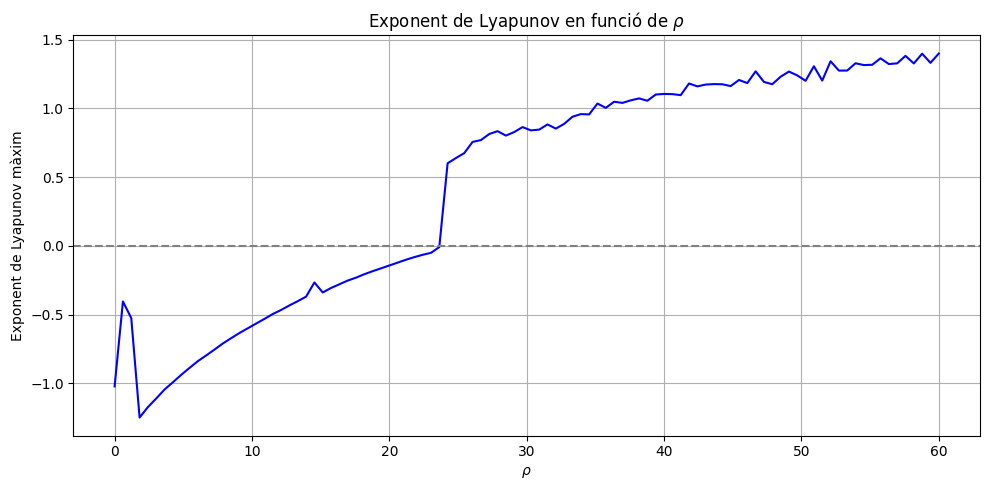

In [78]:
rhos = np.linspace(0, 60, 100)
lyaps = []

for rho in tqdm(rhos):
    lyaps.append(compute_lyapunov(rho))

plt.figure(figsize=(10, 5))
plt.plot(rhos, lyaps, '-b')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('$\\rho$')
plt.ylabel('Exponent de Lyapunov màxim')
plt.title('Exponent de Lyapunov en funció de $\\rho$')
plt.grid(True)
plt.tight_layout()
plt.show()
